In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Synthetic A/B Test Data
np.random.seed(42) # Ensures we get the same results every time

# Create 1000 users for Control (Group A) and 1000 for Test (Group B)
n_A = 1000
n_B = 1000

# Simulate Conversion Rates (Old Ad = 10%, New Ad = 13%)
# We want to see if this 3% difference is "statistically significant"
conversions_A = np.random.binomial(1, 0.10, n_A)
conversions_B = np.random.binomial(1, 0.13, n_B)

# Create DataFrame
df_A = pd.DataFrame({'user_id': range(n_A), 'group': 'A (Control)', 'converted': conversions_A})
df_B = pd.DataFrame({'user_id': range(n_A, n_A + n_B), 'group': 'B (Test)', 'converted': conversions_B})
df = pd.concat([df_A, df_B]).reset_index(drop=True)

# Add "Revenue" column (only for those who converted)
df['revenue'] = df['converted'] * np.random.uniform(50, 150, size=len(df))

# Preview
print("Data Shape:", df.shape)
df.head()

Data Shape: (2000, 4)


,user_id,group,converted,revenue
0,0,A (Control),0,0.00000
1,1,A (Control),1,74.69788
2,2,A (Control),0,0.00000
3,3,A (Control),0,0.00000
4,4,A (Control),0,0.00000


In [2]:
# Calculate Summary Stats
summary = df.groupby('group').agg({
    'user_id': 'count',
    'converted': 'sum',
    'revenue': 'mean'
}).rename(columns={'user_id': 'Total Users', 'converted': 'Conversions'})

# Calculate Conversion Rate
summary['Conversion Rate'] = (summary['Conversions'] / summary['Total Users']) * 100

print("--- A/B Test Summary ---")
print(summary)

--- A/B Test Summary ---
             Total Users  Conversions    revenue  Conversion Rate
group                                                            
A (Control)         1000          100  10.211478             10.0
B (Test)            1000          131  12.453579             13.1


In [3]:
# 1. Hypothesis
# H0 (Null): There is NO difference between Old Ad and New Ad.
# H1 (Alternative): The New Ad is significantly different.

# 2. Run Chi-Square Test (for Categorical Data: Converted vs Not Converted)
contingency_table = pd.crosstab(df['group'], df['converted'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"P-Value: {p_value:.4f}")

# 3. Interpret
alpha = 0.05
if p_value < alpha:
    result = "REJECT Null Hypothesis. The New Ad performs significantly better! 🚀"
else:
    result = "FAIL TO REJECT Null Hypothesis. The difference is likely due to chance. 😐"

print("\nConclusion:", result)

P-Value: 0.0358

Conclusion: REJECT Null Hypothesis. The New Ad performs significantly better! 🚀


/tmp/ipython-input-1037693947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='converted', data=df, errorbar=('ci', 95), palette='viridis')


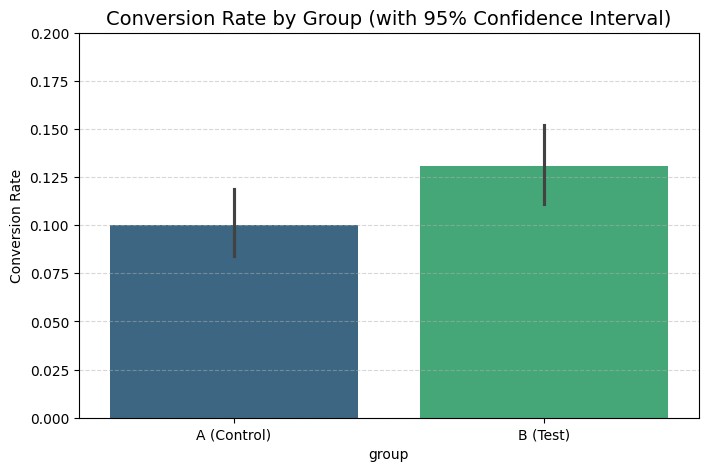

In [4]:
# Plot Conversion Rates with Error Bars
plt.figure(figsize=(8, 5))
sns.barplot(x='group', y='converted', data=df, errorbar=('ci', 95), palette='viridis')

plt.title('Conversion Rate by Group (with 95% Confidence Interval)', fontsize=14)
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.2) # Scale y-axis to 20% for better view
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [5]:
# 1. Save Summary CSV
summary.to_csv('ab_test_summary.csv')

# 2. Save Final Recommendation Text
with open('final_recommendation.txt', 'w') as f:
    f.write(f"A/B Test Analysis Report\n")
    f.write(f"========================\n")
    f.write(f"Control Group (A) Conversion: {summary.loc['A (Control)', 'Conversion Rate']:.2f}%\n")
    f.write(f"Test Group (B) Conversion:    {summary.loc['B (Test)', 'Conversion Rate']:.2f}%\n")
    f.write(f"------------------------\n")
    f.write(f"P-Value: {p_value:.5f}\n")
    f.write(f"Statistical Conclusion: {result}\n")
    f.write(f"------------------------\n")
    f.write(f"Business Recommendation: Adopt the New Ad (Group B) as it drives statistically higher conversions.")

print("Files saved successfully!")

Files saved successfully!
